In [1]:
pip install /kaggle/input/tmllibs/mllibs-0.0.4-py3-none-any.whl --force-reinstall

Processing /kaggle/input/tmllibs/mllibs-0.0.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


![](https://i.imgur.com/pcxhaZ6.jpg)

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>1 |</span></b> <b>MLLIBS TESTING NOTEBOOK</b></div>

#### <b><span style='color:#E888BB'>HELLO MISSING DATA :3</span></b>

- This notebook is just for me to test what can be improved in the module
- Wheel can be imported into any noteook from [dataset](https://www.kaggle.com/datasets/shtrausslearning/mllibs)
- Examples of usage can be found [here](https://www.kaggle.com/code/shtrausslearning/mllibs-sample-eda-notebook)
- The task of this competition is to impute the missing data and submit the `dataframe`

In [2]:
from mllibs.interface import interface

session = interface()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
loading modules ...
making module summary labels...
done ...
eda LogisticRegression() accuracy 1.0
eda_colplot LogisticRegression() accuracy 1.0
eda_plot LogisticRegression() accuracy 1.0
loader LogisticRegression() accuracy 1.0
nlp_encoder LogisticRegression() accuracy 1.0
pd_df LogisticRegression() accuracy 1.0
ms LogisticRegression() accuracy 0.988
models trained...


## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOADING DATA</b></div>

#### <b><span style='color:#E888BB'>LOADING KAGGLE INPUT DATA</span></b>

`mllibs` offers a way to automatically read data from `/kaggle/input`

- As with most datasets, our data is stored in `csv` format, so let's request for csv files to be found in `/kaggle/input/`
- After each session process, we can return the stored data using `.glr()`

In [3]:
session['read kaggle folder csv contents']
session.glr()

[note] no data has been set


{'sample_submission':           id  x_e_out [-]
 0          4          0.0
 1          7          0.0
 2         10          0.0
 3         12          0.0
 4         23          0.0
 ...      ...          ...
 10410  31633          0.0
 10411  31634          0.0
 10412  31637          0.0
 10413  31640          0.0
 10414  31642          0.0
 
 [10415 rows x 2 columns],
 'data':           id    author geometry  pressure [MPa]  mass_flux [kg/m2-s]  \
 0          0  Thompson     tube            7.00               3770.0   
 1          1  Thompson     tube             NaN               6049.0   
 2          2  Thompson      NaN           13.79               2034.0   
 3          3      Beus  annulus           13.79               3679.0   
 4          4       NaN     tube           13.79                686.0   
 ...      ...       ...      ...             ...                  ...   
 31639  31639  Thompson      NaN             NaN               1736.0   
 31640  31640       NaN      NaN  

In [4]:
# store data
session.store(session.glr()['data'],'hf')
session.store(session.glr()['sample_submission'],'sample')
session.store(session.glr()['Data_CHF_Zhao_2020_ATE'],'reference')

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>3 |</span></b> <b>QUICK DATA INSIGHT WITH PANDAS</b></div>

#### <b><span style='color:#E888BB'>PANDAS EDA OPERATIONS</span></b>

Let's utilise some quick `dataframe` insight methods/functions from the pandas library

In [5]:
session['show dataframe info for hf']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31644 entries, 0 to 31643
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   31644 non-null  int64  
 1   author               26620 non-null  object 
 2   geometry             26144 non-null  object 
 3   pressure [MPa]       27192 non-null  float64
 4   mass_flux [kg/m2-s]  26853 non-null  float64
 5   x_e_out [-]          21229 non-null  float64
 6   D_e [mm]             26156 non-null  float64
 7   D_h [mm]             27055 non-null  float64
 8   length [mm]          26885 non-null  float64
 9   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.4+ MB
None


In [6]:
session['show df correlation for hf']

,id,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
id,1.00,0.01,0.01,-0.00,0.00,0.00,0.01,0.00
pressure [MPa],0.01,1.00,-0.20,-0.19,-0.47,-0.50,-0.09,-0.26
mass_flux [kg/m2-s],0.01,-0.20,1.00,-0.17,0.00,-0.18,-0.06,0.31
x_e_out [-],-0.00,-0.19,-0.17,1.00,0.12,0.06,0.34,-0.37
D_e [mm],0.00,-0.47,0.00,0.12,1.00,0.49,0.31,0.02
D_h [mm],0.00,-0.50,-0.18,0.06,0.49,1.00,0.11,0.06
length [mm],0.01,-0.09,-0.06,0.34,0.31,0.11,1.00,-0.28
chf_exp [MW/m2],0.00,-0.26,0.31,-0.37,0.02,0.06,-0.28,1.00


In [7]:
session['show missing for hf']

id                         0
author                  5024
geometry                5500
pressure [MPa]          4452
mass_flux [kg/m2-s]     4791
x_e_out [-]            10415
D_e [mm]                5488
D_h [mm]                4589
length [mm]             4759
chf_exp [MW/m2]            0
dtype: int64


In [8]:
# if we want to reaccess our data 
session.data['hf']

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


<b><span style='color:#E888BB'>SOME TAKAWAYS</span></b>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
<ul>
    <li>Looks like we have quite a bit of missing data; the most in feature <b><span style='color:#E888BB'>x_e_out [-]</span></b> with <b>10415</b> missing rows </li>
    <li>There are a few ways one could go about dealing with missing data; you could try a <b><a href="https://www.kaggle.com/code/shtrausslearning/model-based-data-imputation">model based data imputation approach</a></b>
</ul>
</div>

## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>4 |</span></b> <b>FIGURE VISUALISATIONS</b></div>

#### <b><span style='color:#E888BB'>MLLIBS - HELPER MODULE IN ML PROJECTS</span></b>

- Let's visualise some of the data in the dataset `data`
- Noting the library is intended to be used as a **helper module**, when required we can just call the required methods ourselves
- There isn't a need to always utilise the `nlpi` interpreter module when working on a machine learning project


In [9]:
session.data['hf']['author'].value_counts(dropna=False,normalize=True)

Thompson        0.549741
NaN             0.158766
Janssen         0.085830
Weatherhead     0.064467
Beus            0.050689
Peskov          0.034256
Williams        0.028157
Richenderfer    0.017223
Mortimore       0.006226
Kossolapov      0.003192
Inasaka         0.001454
Name: author, dtype: float64

In [10]:
session.data['hf']['geometry'].value_counts(dropna=False,normalize=True)

tube       0.668215
NaN        0.173809
annulus    0.138446
plate      0.019530
Name: geometry, dtype: float64

#### <b><span style='color:#E888BB'>GENERAL FIGURES</span></b>

Let's look at some general figures, using the column data available to us

plot parameter updated!


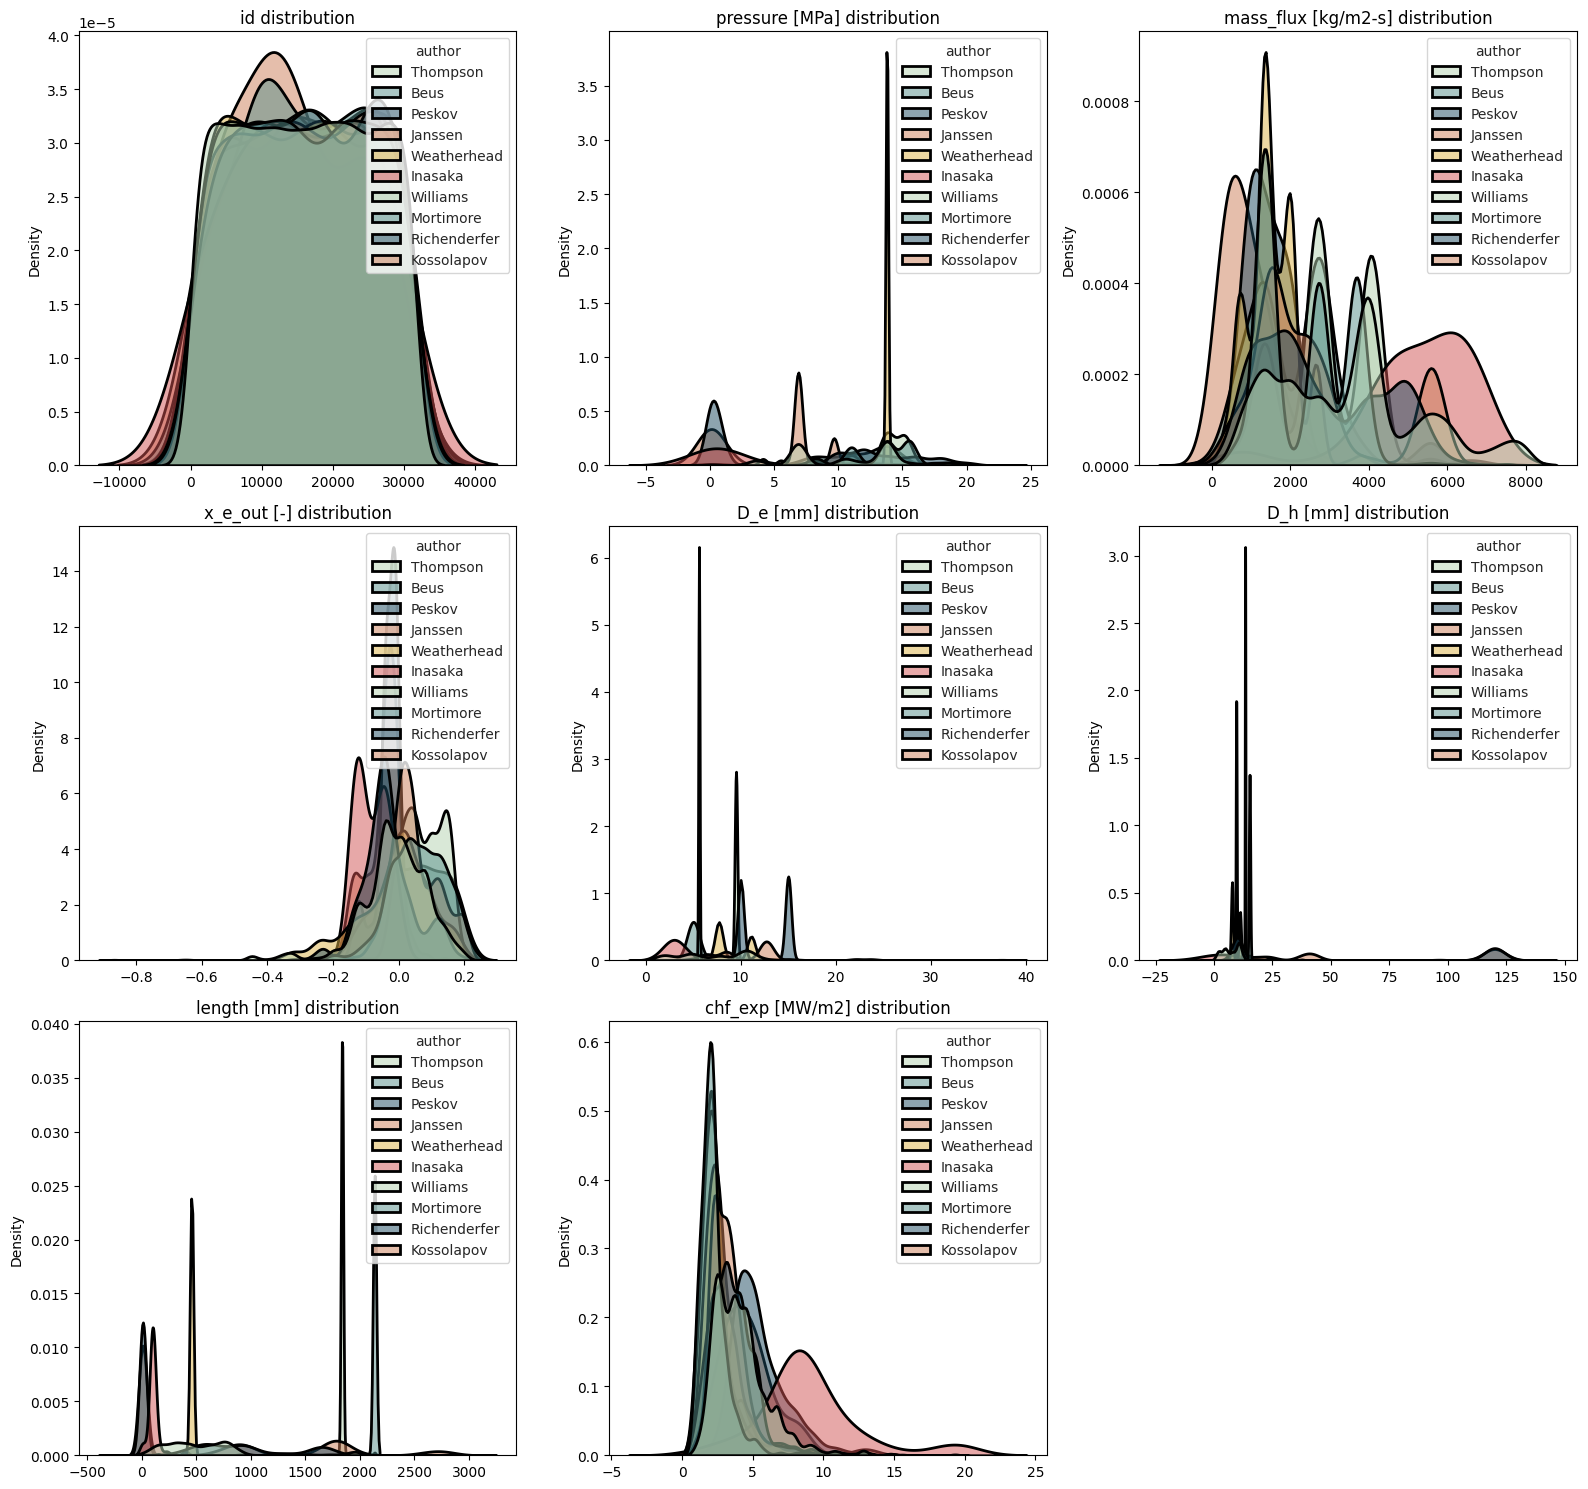

In [11]:
session.setpp({'fill':True,'alpha':0.5,'mew':2})
session['visualise column kdeplot for hf hue author']

plot parameter updated!


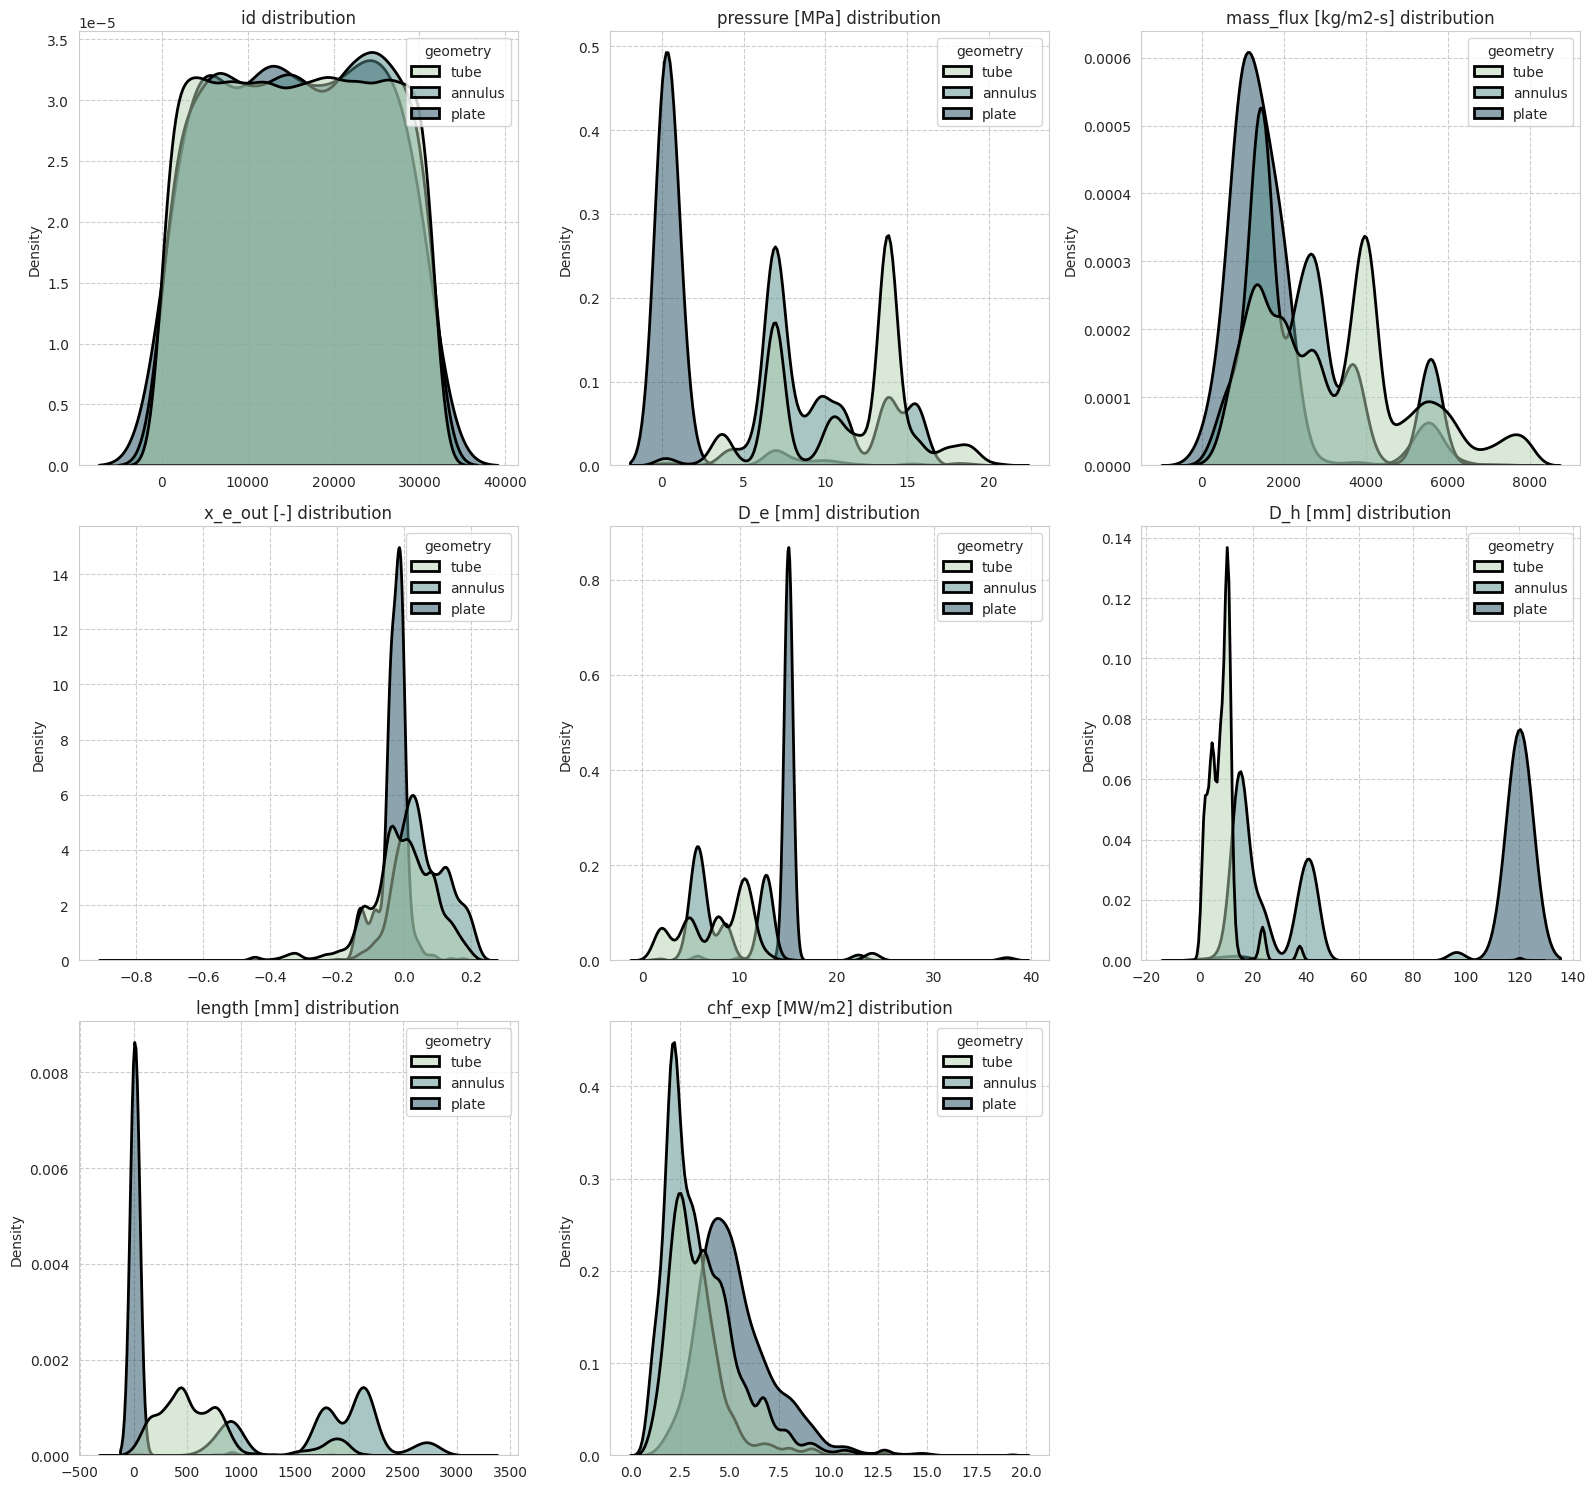

In [12]:
session.setpp({'fill':True,'alpha':0.5,'mew':2})
session['visualise column kdeplot for hf hue geometry']

plot parameter updated!


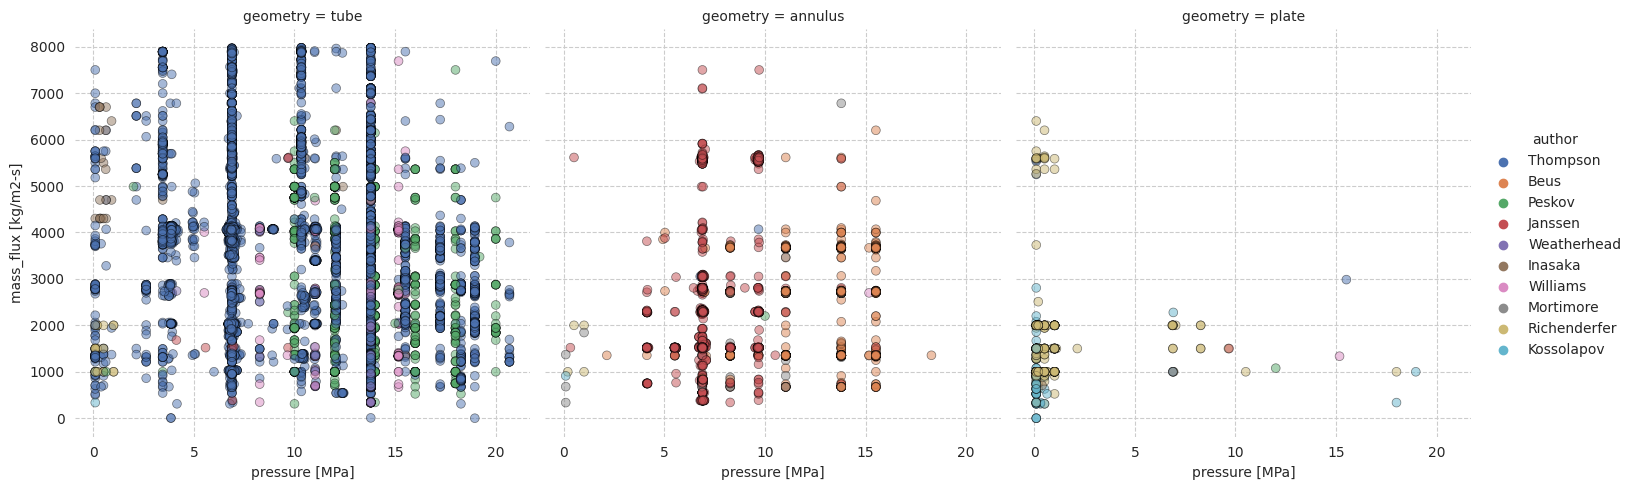

In [13]:
session.setpp({'alpha':0.5,'mec':'k','mew':0.5,'stheme':'deep','s':40})
session['create relplot using hf x pressure [MPa] y mass_flux [kg/m2-s] col geometry hue author']

plot parameter updated!


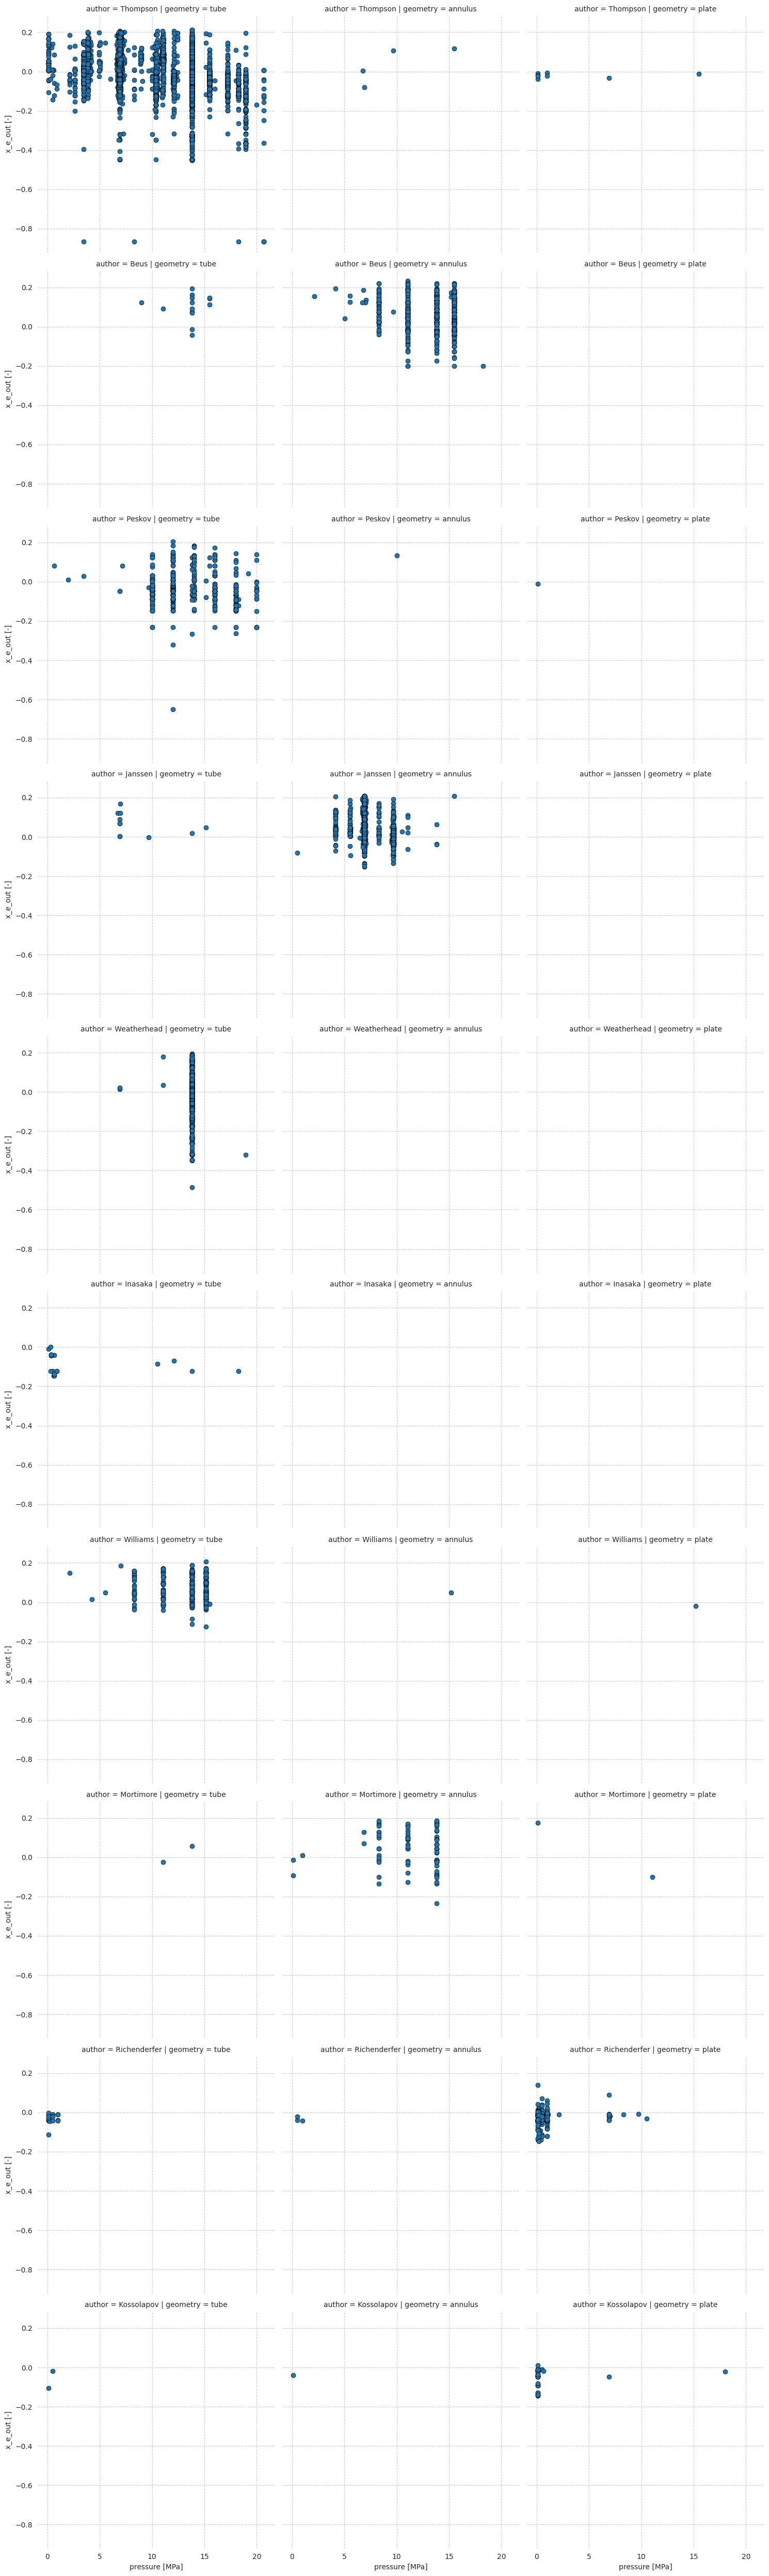

In [14]:
session.setpp({'alpha':1.0,'mec':'k','mew':0.5,'stheme':'deep','s':40})
session['create relplot using hf x pressure [MPa] y x_e_out [-] col geometry row author']

#### <b><span style='color:#E888BB'>TARGET IMPUTATION FEATURE</span></b>

Now let's visualise some relations relating to the imputation feature column `x_e_out [-]`

plot parameter updated!


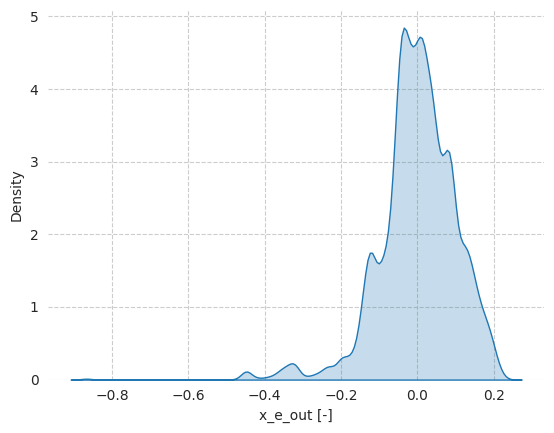

In [15]:
session.setpp({'fill':True,'alpha':0.5,'mew':2})
session['create seaborn kernel density plot using hf x x_e_out [-]']

plot parameter updated!


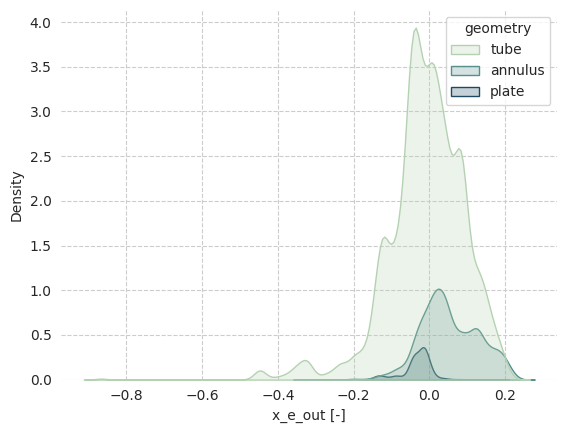

In [16]:
session.setpp({'fill':True,'alpha':0.5,'mew':2})
session['create seaborn kernel density plot using hf x x_e_out [-] hue geometry']

plot parameter updated!


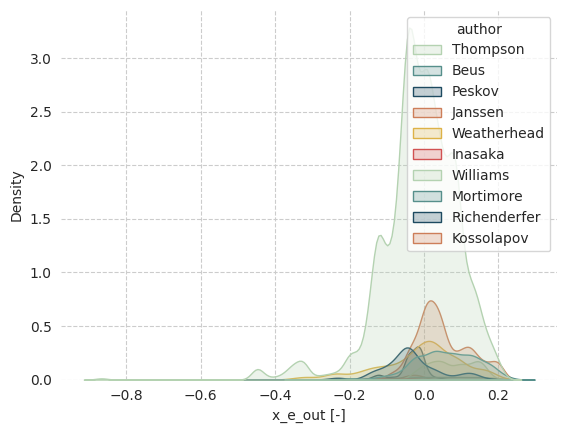

In [17]:
session.setpp({'fill':True,'alpha':0.5,'mew':2})
session['create seaborn kernel density plot using hf x x_e_out [-] hue author']

plot parameter updated!


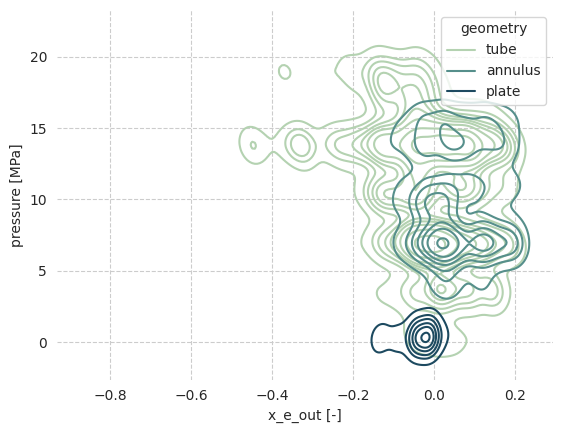

In [18]:
session.setpp({'fill':False,'alpha':0.1,'mew':2})
session['create seaborn kernel density plot using hf x x_e_out [-] y pressure [MPa] hue geometry']

plot parameter updated!


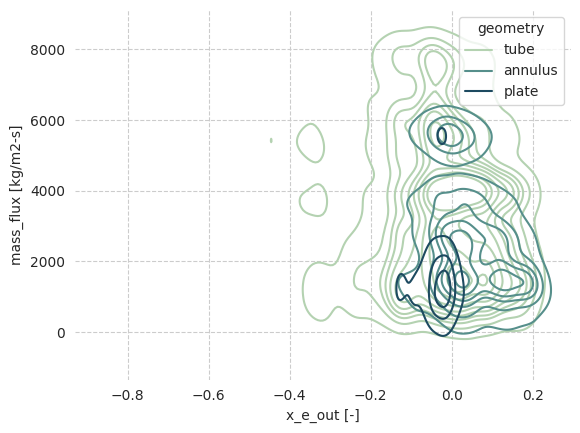

In [19]:
session.setpp({'fill':False,'alpha':0.1,'mew':2})
session['create seaborn kernel density plot using hf x x_e_out [-] y mass_flux [kg/m2-s] hue geometry']

In [20]:
session['concat hf reference join outer axis 0']
session.glr()

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
1860,1861,Richenderfer,plate,1.01,1500.0,-0.0218,15.0,120.0,10.0,9.4
1861,1862,Richenderfer,plate,1.01,1500.0,-0.0434,15.0,120.0,10.0,10.4
1862,1863,Richenderfer,plate,1.01,2000.0,-0.0109,15.0,120.0,10.0,10.8
1863,1864,Richenderfer,plate,1.01,2000.0,-0.0218,15.0,120.0,10.0,10.9


#### <b><span style='color:#E888BB'>COMPARING DATA</span></b>

For whatever reason, we may want to compare two datasets, **containing the same columns**


In [21]:
session['compare subset dataframe hf reference']
session.store(session.glr(),'compare')

In [22]:
session.data['compare']

,index,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],set
0,0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6,first
1,1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,first
2,2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,first
3,3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,first
4,4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8,first
...,...,...,...,...,...,...,...,...,...,...,...,...
33504,1860,1861,Richenderfer,plate,1.01,1500.0,-0.0218,15.0,120.0,10.0,9.4,second
33505,1861,1862,Richenderfer,plate,1.01,1500.0,-0.0434,15.0,120.0,10.0,10.4,second
33506,1862,1863,Richenderfer,plate,1.01,2000.0,-0.0109,15.0,120.0,10.0,10.8,second
33507,1863,1864,Richenderfer,plate,1.01,2000.0,-0.0218,15.0,120.0,10.0,10.9,second


plot parameter updated!


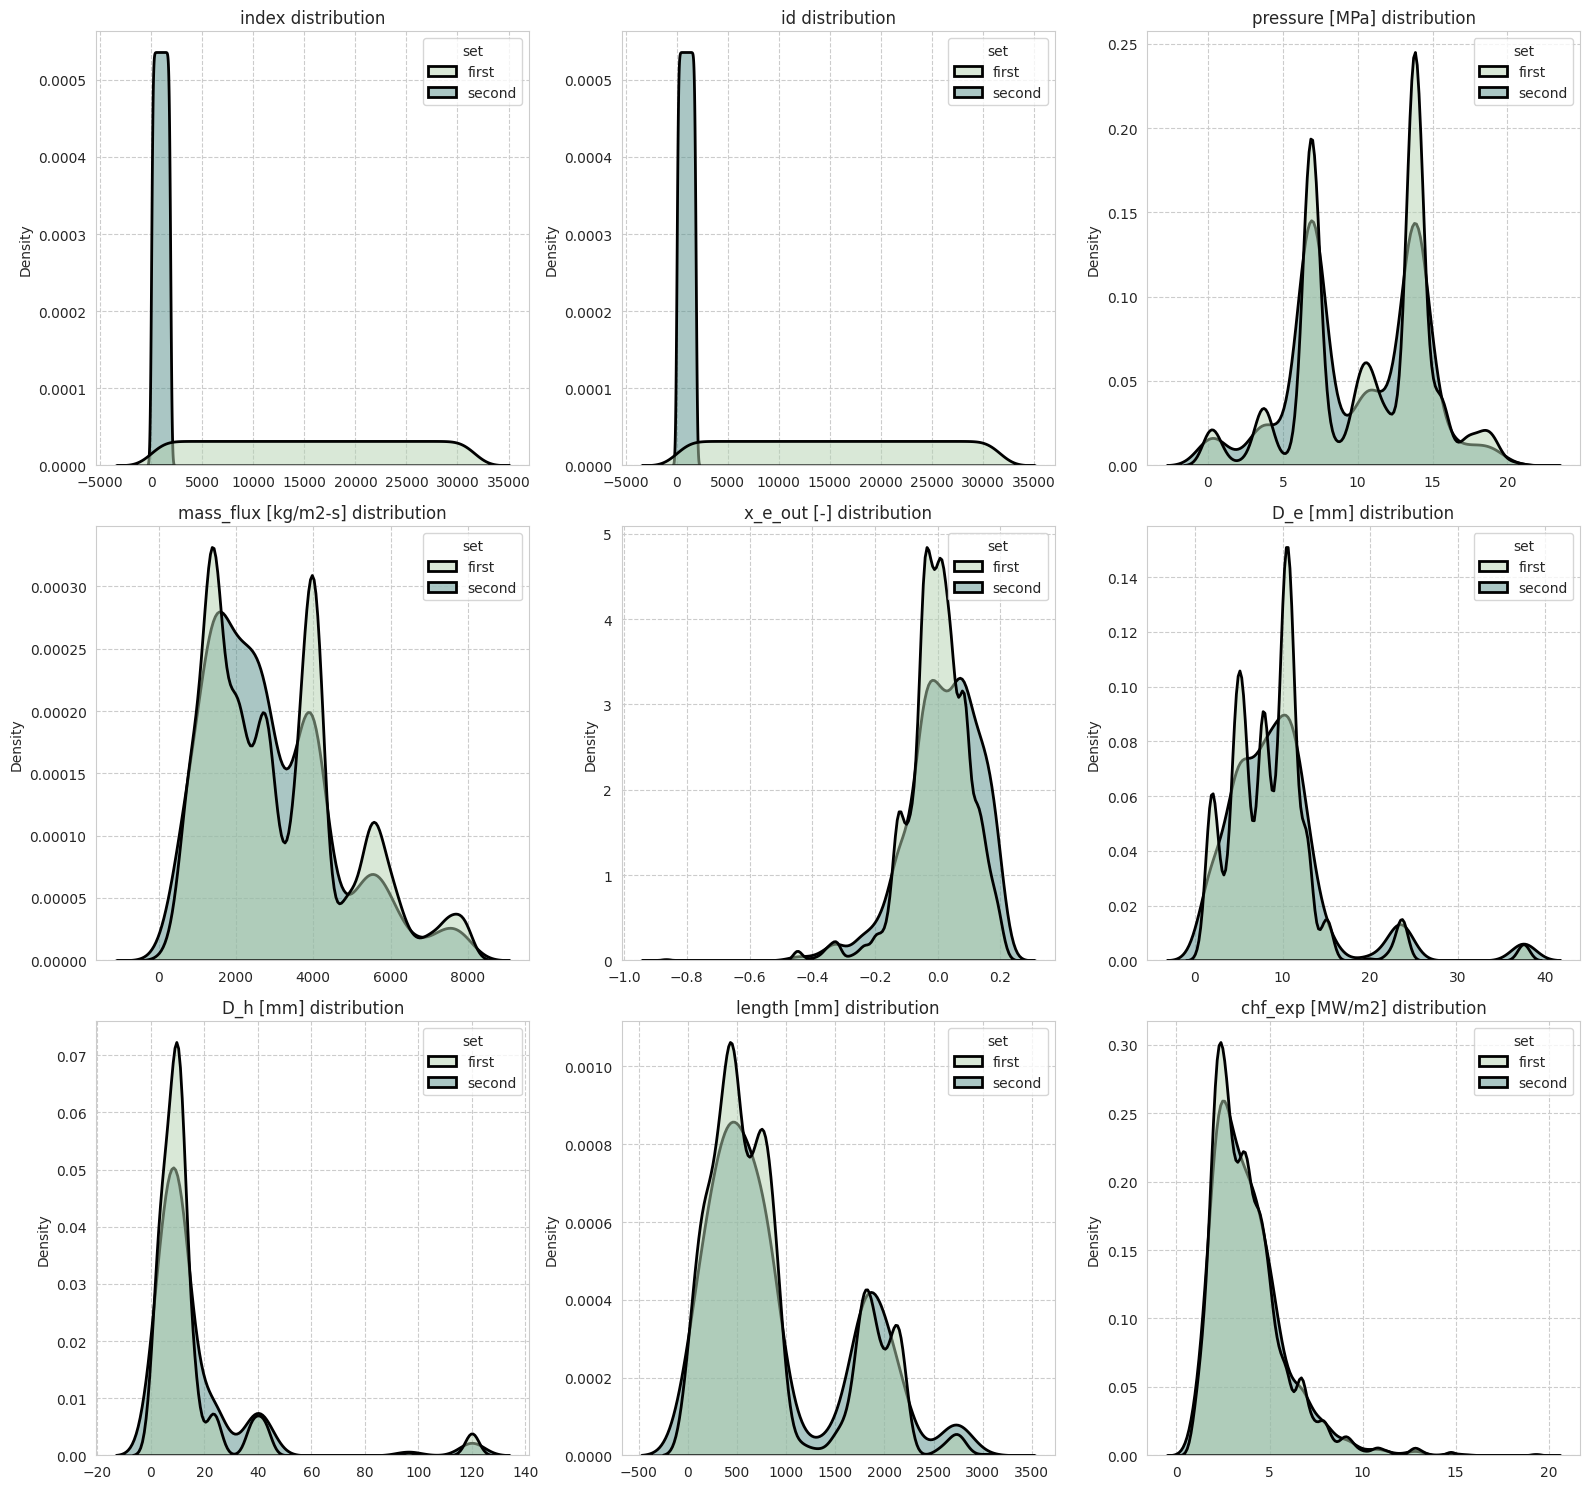

In [23]:
# labels are defined by token order in previous command
session.setpp({'fill':True,'alpha':0.5,'mew':2})
session['visualise column kdeplot for compare hue set']

In [24]:
session.memory_info

,store_csv,show_info,show_corr,show_missing,col_kde,col_kde,srelplot,srelplot,skdeplot,skdeplot,skdeplot,skdeplot,skdeplot,concat,subset_concat,col_kde
module,loader,eda,eda,eda,eda_colplot,eda_colplot,eda_plot,eda_plot,eda_plot,eda_plot,eda_plot,eda_plot,eda_plot,pd_df,pd_df,eda_colplot
action,store data,table operation,show plot,show plot,show plot,show plot,show plot,show plot,show plot,show plot,show plot,show plot,show plot,action,action,show plot
topic,system operation,exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),exploratory data analysis (eda),topic,topic,exploratory data analysis (eda)
subtopic,read csv data,inspect dataframe,show correlation,visualise missing data,column eda,column eda,scatter figure,scatter figure,scatter figure,scatter figure,scatter figure,scatter figure,scatter figure,sub topic,sub topic,column eda
input_format,None,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame,pd.DataFrame
output_format,list,pd.DataFrame,figure,figure,figure,figure,figure,figure,figure,figure,figure,figure,figure,figure,figure,figure
description,find and store CSV format data,show dataframe information,visualise linear correlation between features,show showing missing data in data frame columns,visualise/plot column feature kernel density e...,visualise/plot column feature kernel density e...,"Create a seaborn relation plot using relplot, ...","Create a seaborn relation plot using relplot, ...",Create a seaborn kernel density estimation plo...,Create a seaborn kernel density estimation plo...,Create a seaborn kernel density estimation plo...,Create a seaborn kernel density estimation plo...,Create a seaborn kernel density estimation plo...,merge together two dataframes,label two subset dataframes,visualise/plot column feature kernel density e...
task_id,1,0,4,1,2,2,4,4,2,2,2,2,2,1,2,2
gtask_id,20,0,4,1,7,7,12,12,10,10,10,10,10,29,30,7
module_id,3,0,0,0,1,1,2,2,2,2,2,2,2,5,5,1


## <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#E888BB"><b><span style='color:#FFFFFF'>5 |</span></b> <b>ISSUES</b></div>

#### <b><span style='color:#E888BB'>LETS TRY TO FIX THESE</span></b>

- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">issue</mark>** Need to add functionality to automatically store **key accessible** data into `self.memory_output` (**list**), perhaps change output to **OrderedDict**
- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">issue</mark>** When we have too many subgroups for `hue` static images don't allow us to manually explore them (like in plotly)
- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">function</mark>** add the imputation extension module (**pandas** & **model approaches**)
- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">function</mark>** add smote data generatation extension module & allow for quick data distribution comparison between two subsets
- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">function</mark>** add the ability to select NaN groups based on columns
- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">function</mark>** add the ability to compare two data visualisations side by side (relplot with hue is not sufficient)



#### <b><span style='color:#E888BB'>ADJUSTMENTS</span></b>

- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">issue</mark>** Modification of tokensation to account for symbols in names (split should not occur at [ etc) 

    - `word_tokenizer` replaced with `WhitespaceTokenizer` for **input tokenisation** only (0.0.4)
    - Fixed issue of finding index of **tokens** only (bigram and trigrams were ignored) in `nlpi` 
    
  
- **<mark style="background-color:#E888BB;color:white;border-radius:5px;opacity:0.9">issue</mark>** added `.reset_index` to dataset labeller function in `subset_label` (function adds column and gives label to dataset)

In [25]:
from nltk.tokenize import word_tokenize, WhitespaceTokenizer
import spacy

# nlp = spacy.load('en_core_web_sm')
# doc = nlp('hello this is a test [MP] or ')

# # spacy
# for token in doc:
#     print(token)
    
# print(word_tokenize('hello this is a test [MP] or '))

# # ws tokeniser
# print(WhitespaceTokenizer().tokenize('hello this is a test [MP] or '))

# def n_grams(tokens,n):
#         lst_bigrams = [' '.join(i) for i in [tokens[i:i+n] for i in range(len(tokens)-n+1)]]
#         return lst_bigrams

''' problem '''

# we are required to check the previour token in tokens, having found bigram,trigram

inputs = 'create relplot using hf x pressure [MPa] y mass_flux [kg/m2-s] col author'
tokeniser = WhitespaceTokenizer()
tokens = tokeniser.tokenize(inputs)

# the relevant token found in column
index_in_tokens = inputs.index('pressure [MPa]')
index_in_tokens

# indicies for tokens
tokens_index = list(tokeniser.span_tokenize(inputs))

for ii,segment in enumerate(tokens_index):
    if(index_in_tokens in segment):
        print(tokens[ii-1])        

x



<b><span style='color:#E888BB'>SOME TAKAWAYS</span></b>
    
<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
    <li>Evidently, working with missing data is a big part of a machine learning project</li>
    <li>mllibs needs to integrate more extension modules which allow us to work with missing data</li>
    <li>In particular, it would be benefitial to include not only imputation methods, but also ways to visualise distributions, pre/post imputation, as well methods that allow us to select missing data and group them (eg. based on columns)</li>
</ul>
</div>